# **Ejercicio 2**

## **Librerias necesarias**

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
import warnings
warnings.filterwarnings('ignore')
import numpy as np


Nota: En este ejercicio se usará el mismo DataFrame del ejercicio anterior. Sin embargo, para efectos de práctica lo llamaremos nuevamente.

In [48]:
olimpicos_url = "https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv"
df_olimpicos = pd.read_csv(olimpicos_url) 
df_olimpicos.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## **Inciso 1**
**Crear un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible el patrón global de las características de height y weight de los ganadores de medallas de 2016 de los cinco deportes.**

In [49]:
deportes = ["Athletics", "Swimming", "Rowing", "Football", "Hockey"]
dep_2016 = df_olimpicos[(df_olimpicos['Year'] == 2016) & (df_olimpicos['Medal'].notna()) & 
                        (df_olimpicos['Sport'].isin(deportes))]
dep_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


In [50]:
dep_2016.describe(include=object)

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,732,732,732,732,732,732,732,732,732,732
unique,648,2,54,54,1,1,1,5,99,3
top,"Michael Fred Phelps, II",M,United States,USA,2016 Summer,Summer,Rio de Janeiro,Athletics,Football Women's Football,Gold
freq,6,377,127,127,732,732,732,192,54,254


In [51]:
dep_2016.describe()

,ID,Age,Height,Weight,Year
count,732.000000,732.000000,729.000000,727.000000,732.0
mean,68648.244536,25.577869,180.023320,73.720770,2016.0
std,39361.251654,4.451373,10.076398,14.279014,0.0
min,62.000000,16.000000,150.000000,40.000000,2016.0
25%,32676.750000,22.000000,173.000000,64.000000,2016.0
50%,73187.000000,25.000000,180.000000,72.000000,2016.0
75%,103225.000000,29.000000,187.000000,82.000000,2016.0
max,135525.000000,40.000000,207.000000,136.000000,2016.0


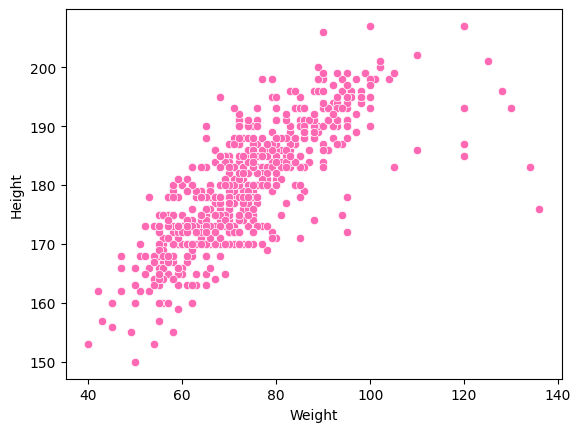

In [52]:
ax = sns.scatterplot(x="Weight", y="Height", data=dep_2016, color = '#FF69B4')

## **Inciso 2**
**Crear un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible la estadística de resumen para la altura y el peso de los jugadores que ganaron cada tipo de medalla (oro/plata/bronce) en los datos.**

In [53]:
dep_medallas = (dep_2016.groupby(['Medal'])
                .size()  
                .reset_index(name ='Count').sort_values(by ='Count', ascending = False))  
dep_medallas

,Medal,Count
1,Gold,254
2,Silver,242
0,Bronze,236


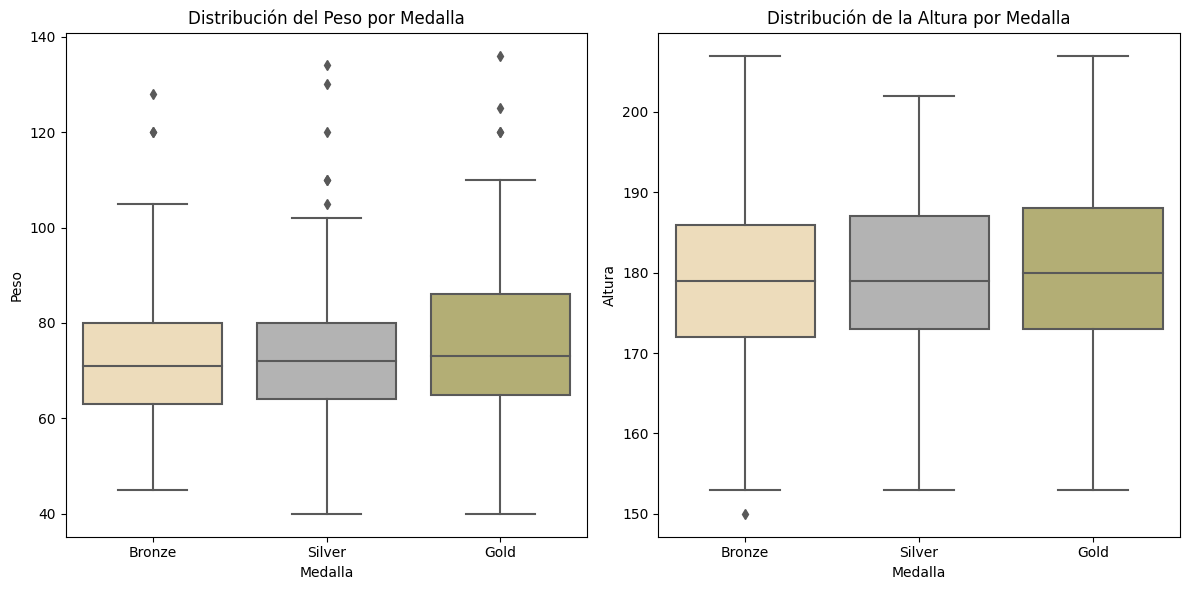

In [54]:
palet = [ '#F5DEB3', '#B3B3B3' , '#BDB76B']
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
sns.boxplot(x = 'Medal', y = 'Weight', data = dep_2016, palette = palet )
plt.title('Distribución del Peso por Medalla')
plt.xlabel('Medalla')
plt.ylabel('Peso')

plt.subplot(1, 2, 2) 
sns.boxplot(x = 'Medal', y = 'Height', data = dep_2016, palette = palet)
plt.title('Distribución de la Altura por Medalla')
plt.xlabel('Medalla')
plt.ylabel('Altura')

plt.tight_layout() # Ajusta el espacio y ayuda a evitar superposiciones
plt.show()
